In [1]:
import os
import sys
import itertools
import math
import logging
import json as js
import re
import random
import imgaug
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import skimage.draw

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
# Run one of the code blocks

# Shapes toy dataset
# import shapes
# config = shapes.ShapesConfig()

# MS COCO Dataset
from samples.raspberries import raspberriesV2Classes
config = raspberriesV2Classes.RaspberryConfig()
config.display()
RASP_DIR = os.path.join(ROOT_DIR, "datasets/raspberry2")  # TODO: enter value here


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             10.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_mask_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'rpn_bbox_loss': 1.0, 'rpn_class_loss': 1.0, 'mrcnn_class_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [3]:
# Load dataset

config.NAME == "raspberry"
dataset = raspberriesV2Classes.RaspberryDataset()
dataset.load_raspberry(RASP_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 246
Class Count: 3
  0. BG                                                
  1. raspberry_1                                       
  2. raspberry_2                                       


In [4]:
augmentation = imgaug.augmenters.Sequential([imgaug.augmenters.Sometimes(0.5,imgaug.augmenters.Fliplr(0.5)),  # Flip
                        imgaug.augmenters.Sometimes(0.5,imgaug.augmenters.Flipud(0.5)), # Flip half of images vertically
                        imgaug.augmenters.Sometimes(0.5,imgaug.augmenters.Affine(rotate=(-20, 20))),  #rotate
                        imgaug.augmenters.Sometimes(0.5,imgaug.augmenters.Affine(shear=(-10, 10)))])  #Shear
        
# Just flip L/R
augmentation1 = imgaug.augmenters.Fliplr(0.5)  # Flip half of images horizontally

# Flip horizontal and vertical
augmentation2 = imgaug.augmenters.Sequential([imgaug.augmenters.Fliplr(0.5),
                imgaug.augmenters.Flipud(0.5)])

# Just Rotate
augmentation3 = imgaug.augmenters.Affine(rotate=(-20, 20))  #rotate

# Just Shear
augmentation4 = imgaug.augmenters.Affine(shear=(-10, 10))  #Shear

# rotate and shear
augmentation5 = imgaug.augmenters.Sequential([imgaug.augmenters.Affine(rotate=(-20, 20)),
                        imgaug.augmenters.Affine(shear=(-10, 10))])


normal image  1
/host/Mask_RCNN/datasets/raspberry2/val/119.png
0


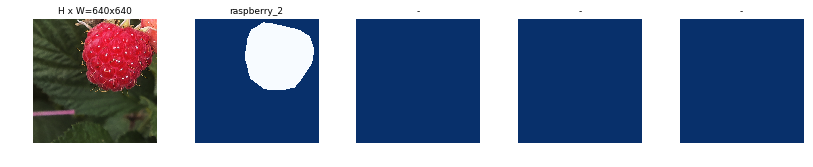

normal image  2
/host/Mask_RCNN/datasets/raspberry2/val/128.png
1


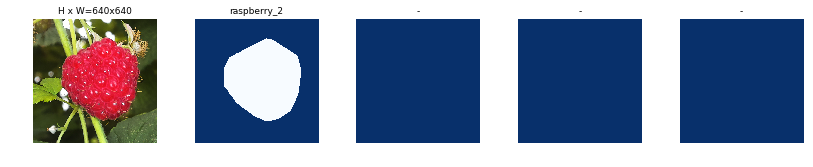

normal image  3
/host/Mask_RCNN/datasets/raspberry2/val/132.png
2


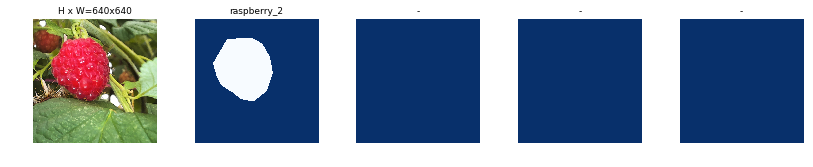

normal image  4
/host/Mask_RCNN/datasets/raspberry2/val/104.png
3


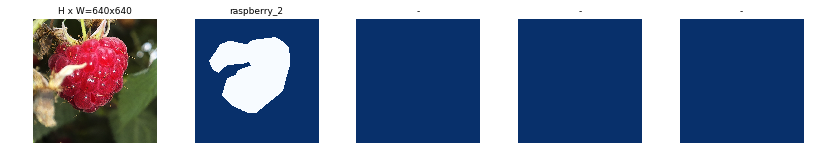

normal image  5
/host/Mask_RCNN/datasets/raspberry2/val/168.png
4


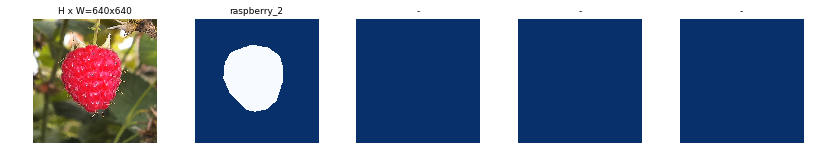

normal image  6
/host/Mask_RCNN/datasets/raspberry2/val/122.png
5


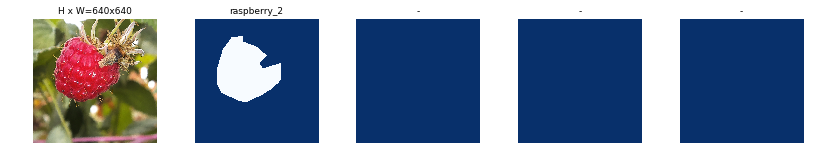

normal image  7
/host/Mask_RCNN/datasets/raspberry2/val/215.png
6


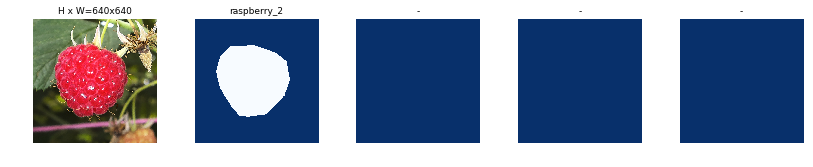

normal image  8
/host/Mask_RCNN/datasets/raspberry2/val/156.png
7


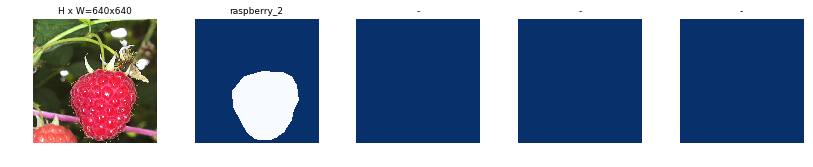

normal image  9
/host/Mask_RCNN/datasets/raspberry2/val/195.png
8


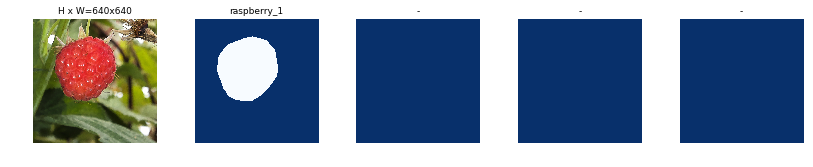

normal image  10
/host/Mask_RCNN/datasets/raspberry2/val/148.png
9


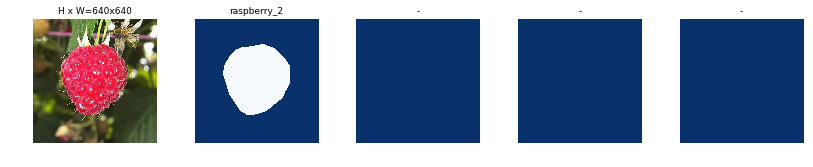

normal image  11
/host/Mask_RCNN/datasets/raspberry2/val/235.png
10


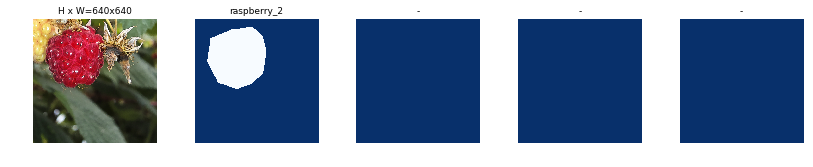

normal image  12
/host/Mask_RCNN/datasets/raspberry2/val/82.png
11


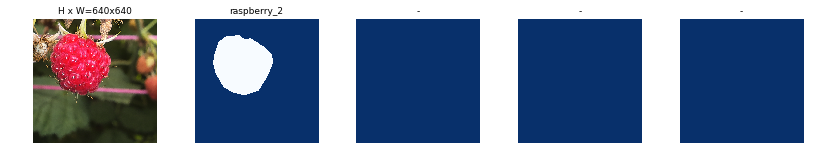

normal image  13
/host/Mask_RCNN/datasets/raspberry2/val/245.png
12


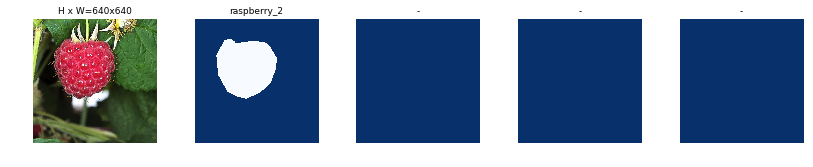

normal image  14
/host/Mask_RCNN/datasets/raspberry2/val/231.png
13


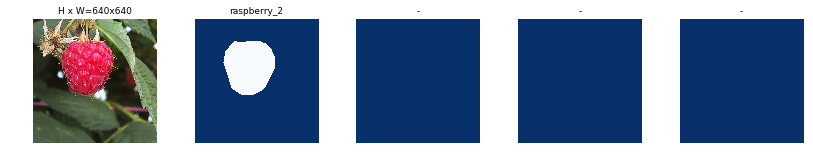

normal image  15
/host/Mask_RCNN/datasets/raspberry2/val/127.png
14


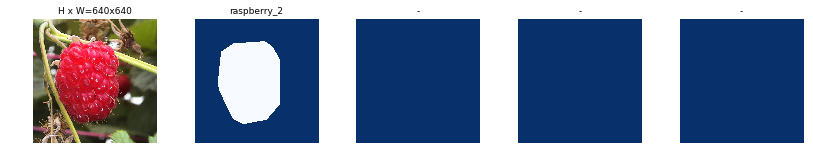

normal image  16
/host/Mask_RCNN/datasets/raspberry2/val/107.png
15


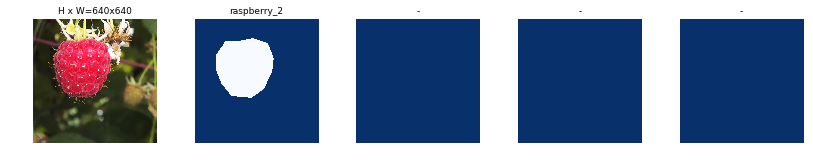

normal image  17
/host/Mask_RCNN/datasets/raspberry2/val/246.png
16


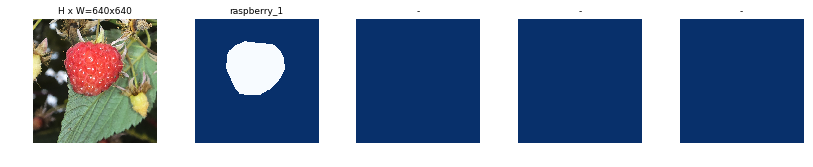

normal image  18
/host/Mask_RCNN/datasets/raspberry2/val/125.png
17


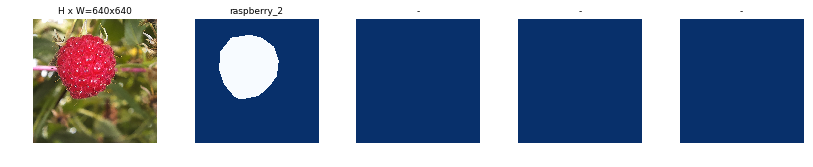

normal image  19
/host/Mask_RCNN/datasets/raspberry2/val/160.png
18


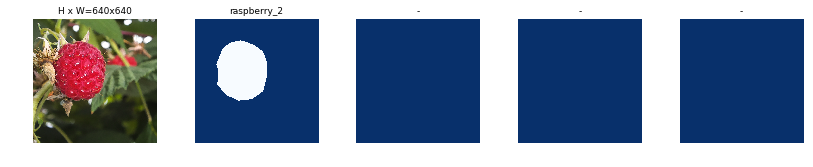

normal image  20
/host/Mask_RCNN/datasets/raspberry2/val/25.png
19


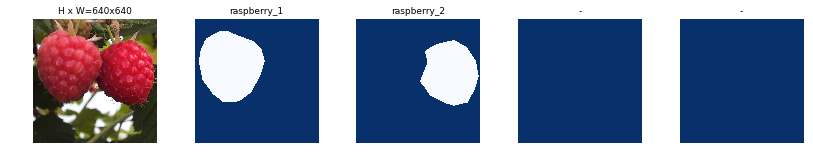

normal image  21
/host/Mask_RCNN/datasets/raspberry2/val/197.png
20


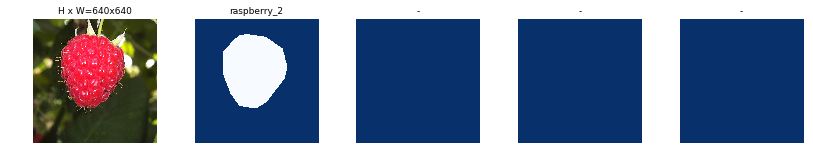

normal image  22
/host/Mask_RCNN/datasets/raspberry2/val/78.png
21


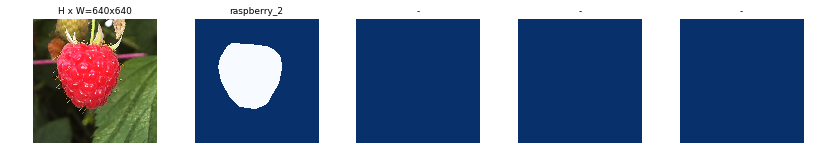

normal image  23
/host/Mask_RCNN/datasets/raspberry2/val/59.png
22


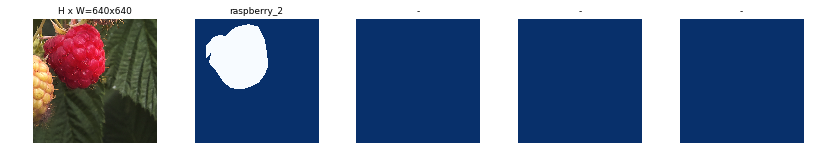

normal image  24
/host/Mask_RCNN/datasets/raspberry2/val/15.png
23


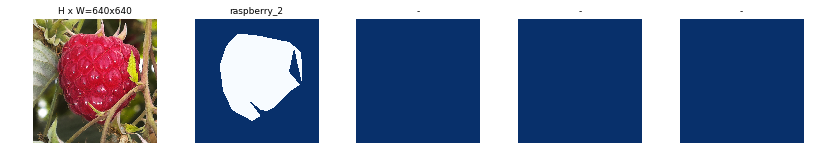

normal image  25
/host/Mask_RCNN/datasets/raspberry2/val/40.png
24


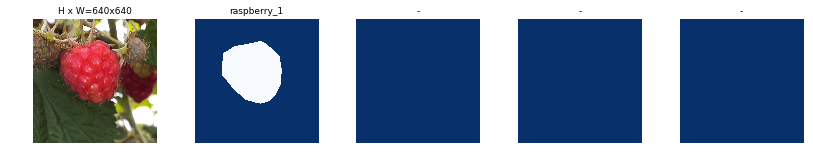

normal image  26
/host/Mask_RCNN/datasets/raspberry2/val/56.png
25


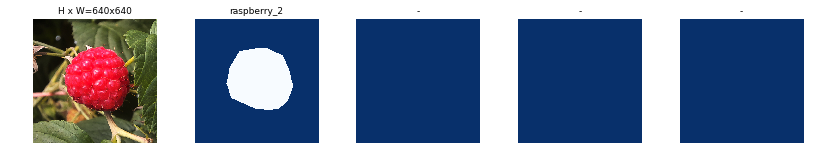

normal image  27
/host/Mask_RCNN/datasets/raspberry2/val/30.png
26


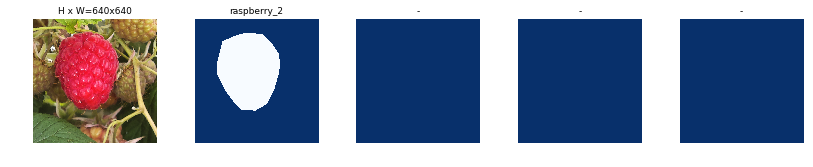

normal image  28
/host/Mask_RCNN/datasets/raspberry2/val/48.png
27


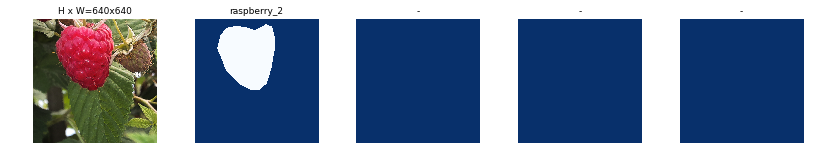

normal image  29
/host/Mask_RCNN/datasets/raspberry2/val/105.png
28


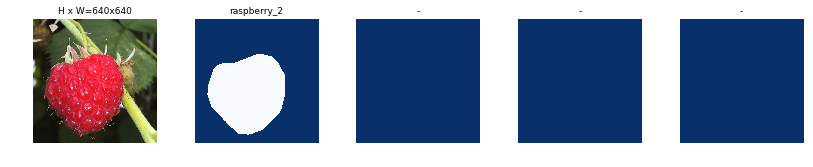

normal image  30
/host/Mask_RCNN/datasets/raspberry2/val/60.png
29


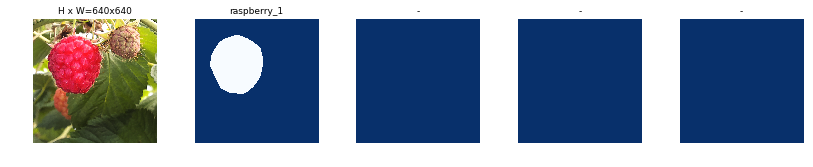

normal image  31
/host/Mask_RCNN/datasets/raspberry2/val/212.png
30


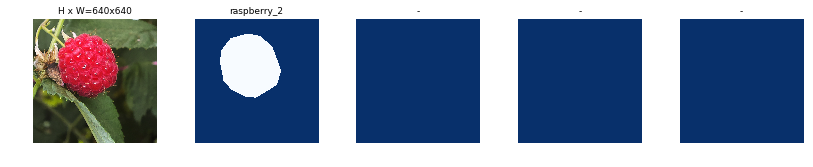

normal image  32
/host/Mask_RCNN/datasets/raspberry2/val/85.png
31


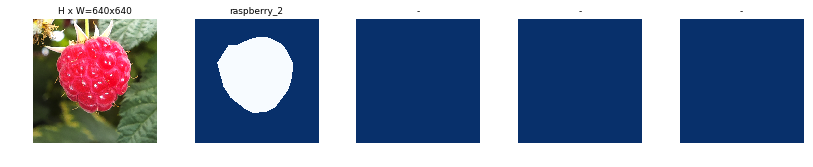

normal image  33
/host/Mask_RCNN/datasets/raspberry2/val/2.png
32


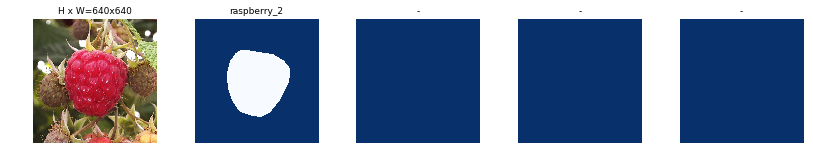

normal image  34
/host/Mask_RCNN/datasets/raspberry2/val/182.png
33


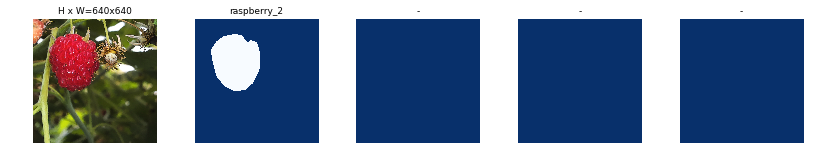

normal image  35
/host/Mask_RCNN/datasets/raspberry2/val/117.png
34


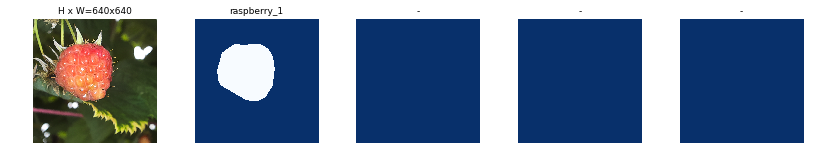

normal image  36
/host/Mask_RCNN/datasets/raspberry2/val/110.png
35


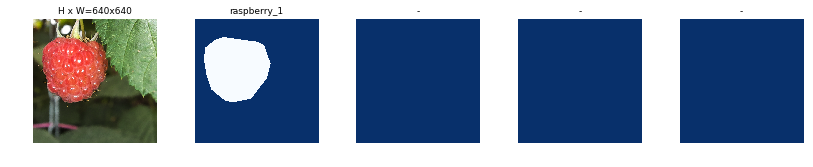

normal image  37
/host/Mask_RCNN/datasets/raspberry2/val/145.png
36


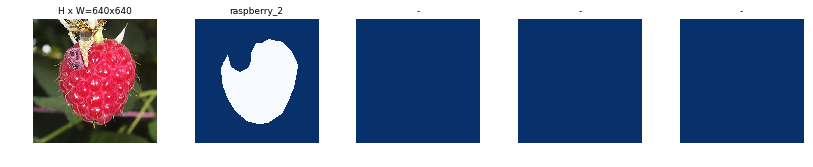

normal image  38
/host/Mask_RCNN/datasets/raspberry2/val/46.png
37


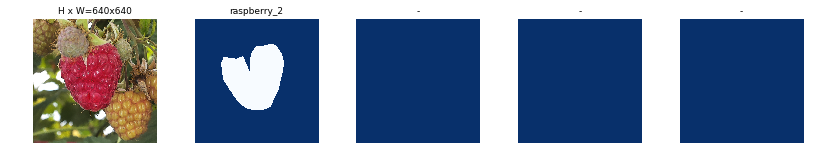

normal image  39
/host/Mask_RCNN/datasets/raspberry2/val/234.png
38


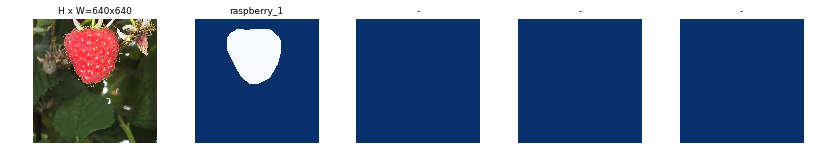

normal image  40
/host/Mask_RCNN/datasets/raspberry2/val/96.png
39


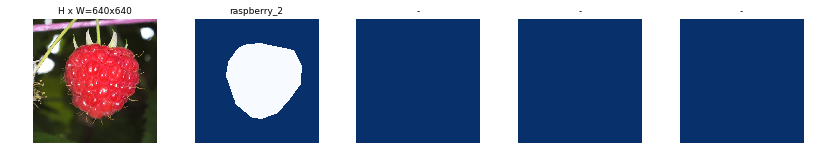

normal image  41
/host/Mask_RCNN/datasets/raspberry2/val/209.png
40


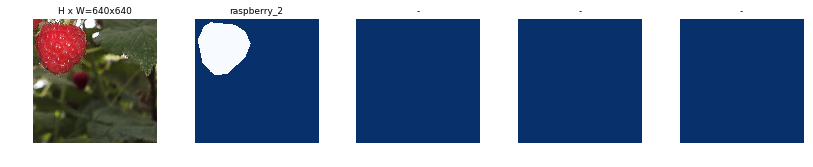

normal image  42
/host/Mask_RCNN/datasets/raspberry2/val/158.png
41


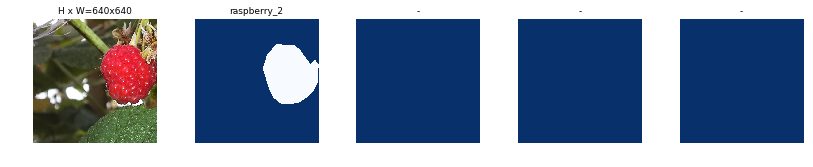

normal image  43
/host/Mask_RCNN/datasets/raspberry2/val/90.png
42


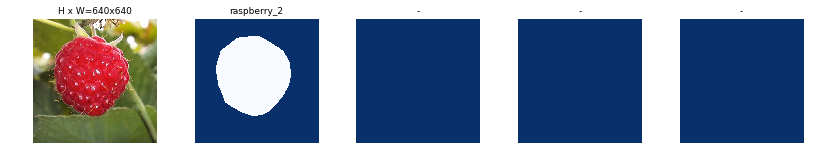

normal image  44
/host/Mask_RCNN/datasets/raspberry2/val/200.png
43


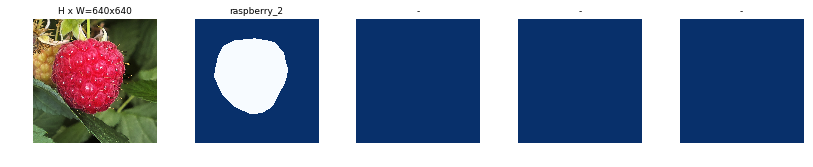

normal image  45
/host/Mask_RCNN/datasets/raspberry2/val/21.png
44


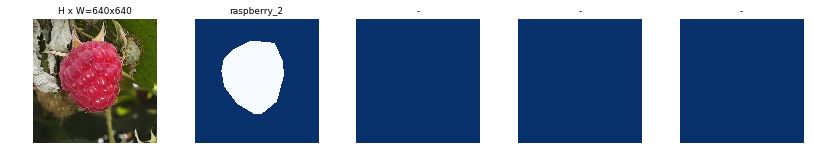

normal image  46
/host/Mask_RCNN/datasets/raspberry2/val/198.png
45


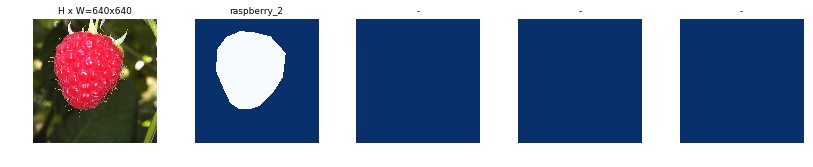

normal image  47
/host/Mask_RCNN/datasets/raspberry2/val/152.png
46


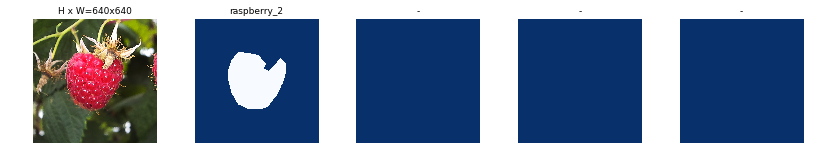

normal image  48
/host/Mask_RCNN/datasets/raspberry2/val/147.png
47


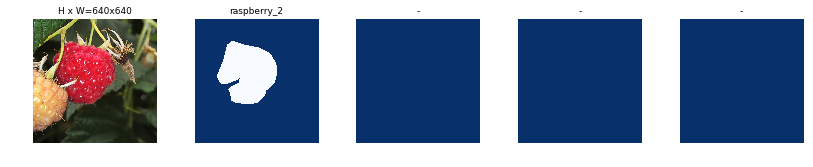

normal image  49
/host/Mask_RCNN/datasets/raspberry2/val/250.png
48


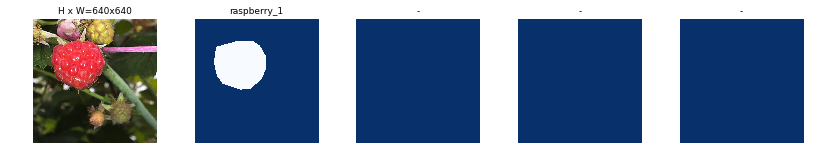

normal image  50
/host/Mask_RCNN/datasets/raspberry2/val/247.png
49


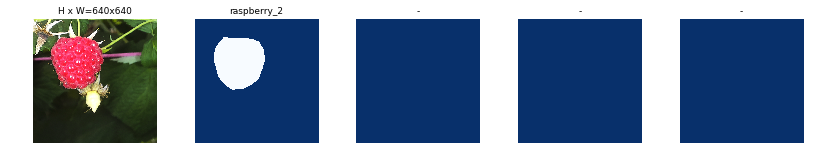

normal image  51
/host/Mask_RCNN/datasets/raspberry2/val/93.png
50


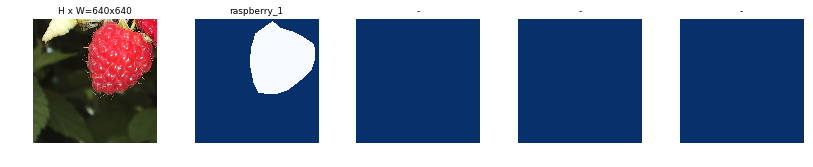

normal image  52
/host/Mask_RCNN/datasets/raspberry2/val/224.png
51


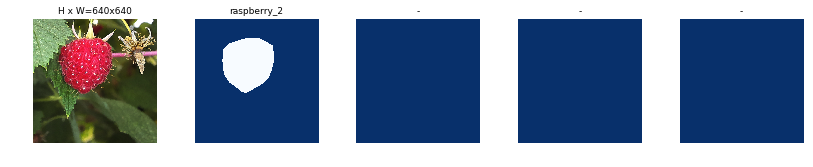

normal image  53
/host/Mask_RCNN/datasets/raspberry2/val/166.png
52


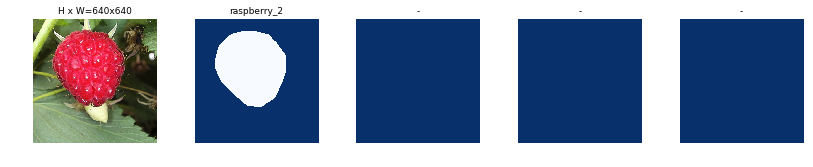

normal image  54
/host/Mask_RCNN/datasets/raspberry2/val/179.png
53


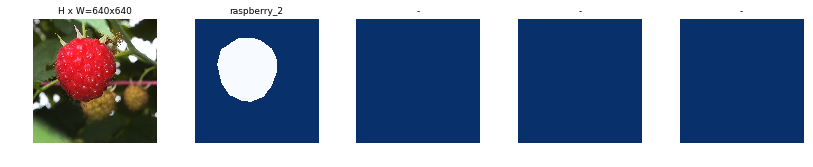

normal image  55
/host/Mask_RCNN/datasets/raspberry2/val/205.png
54


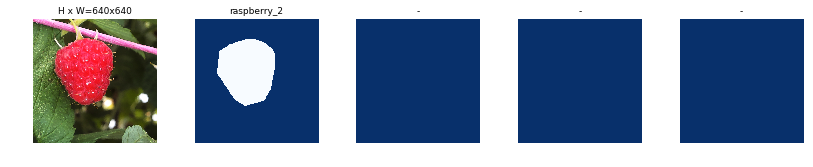

normal image  56
/host/Mask_RCNN/datasets/raspberry2/val/67.png
55


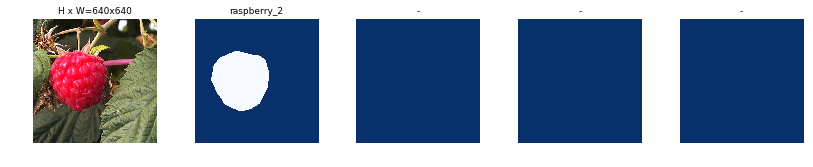

normal image  57
/host/Mask_RCNN/datasets/raspberry2/val/177.png
56


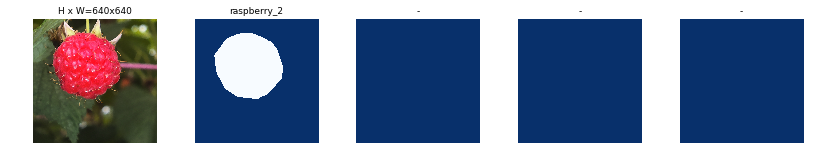

normal image  58
/host/Mask_RCNN/datasets/raspberry2/val/109.png
57


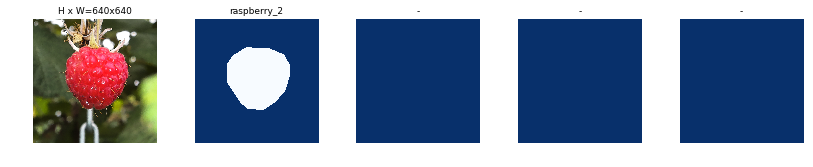

normal image  59
/host/Mask_RCNN/datasets/raspberry2/val/159.png
58


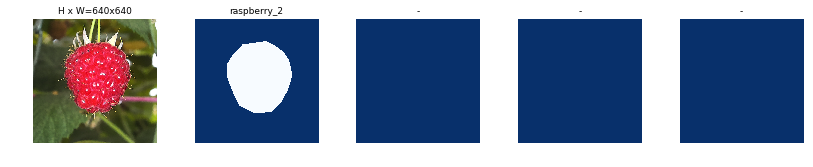

normal image  60
/host/Mask_RCNN/datasets/raspberry2/val/139.png
59


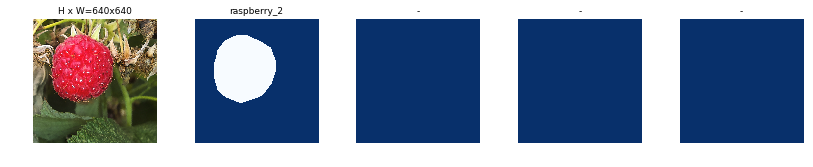

normal image  61
/host/Mask_RCNN/datasets/raspberry2/val/149.png
60


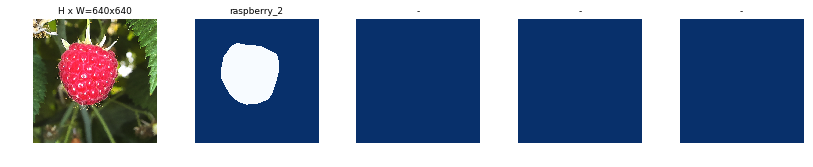

normal image  62
/host/Mask_RCNN/datasets/raspberry2/val/8.png
61


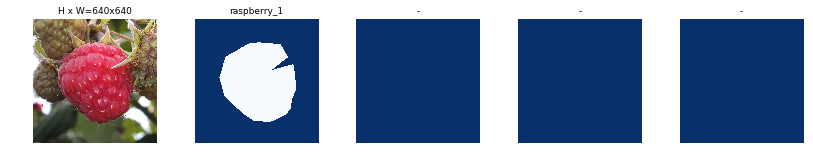

normal image  63
/host/Mask_RCNN/datasets/raspberry2/val/52.png
62


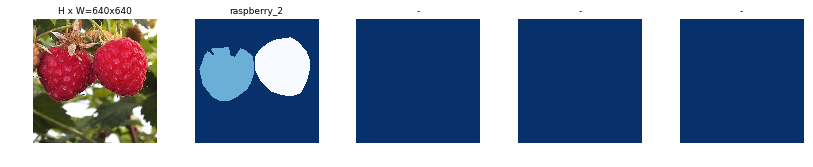

normal image  64
/host/Mask_RCNN/datasets/raspberry2/val/3.png
63


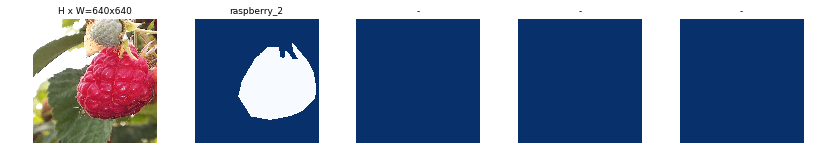

normal image  65
/host/Mask_RCNN/datasets/raspberry2/val/83.png
64


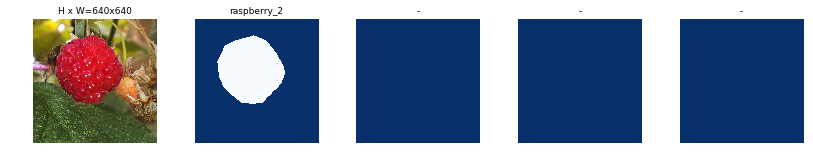

normal image  66
/host/Mask_RCNN/datasets/raspberry2/val/20.png
65


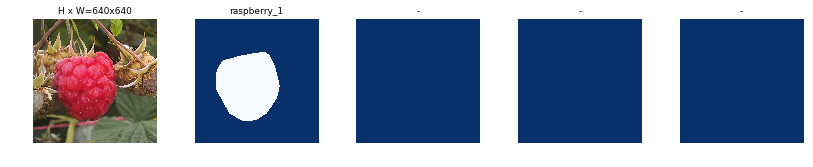

normal image  67
/host/Mask_RCNN/datasets/raspberry2/val/51.png
66


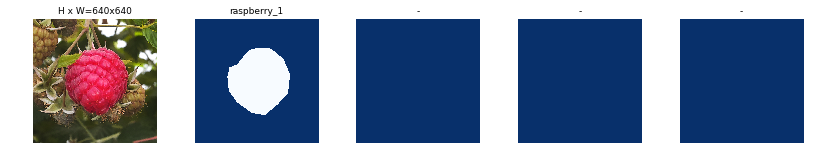

normal image  68
/host/Mask_RCNN/datasets/raspberry2/val/165.png
67


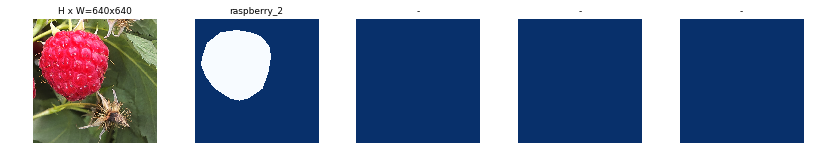

normal image  69
/host/Mask_RCNN/datasets/raspberry2/val/203.png
68


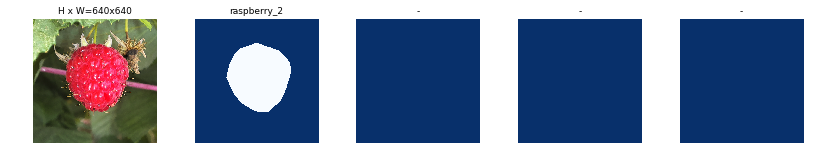

normal image  70
/host/Mask_RCNN/datasets/raspberry2/val/232.png
69


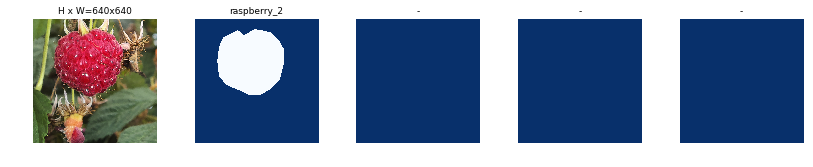

normal image  71
/host/Mask_RCNN/datasets/raspberry2/val/14.png
70


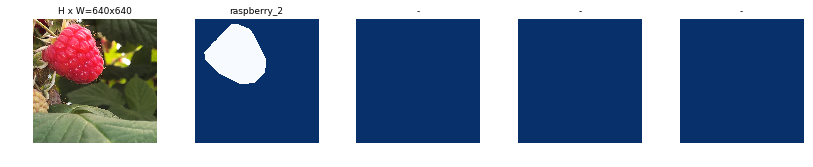

normal image  72
/host/Mask_RCNN/datasets/raspberry2/val/27.png
71


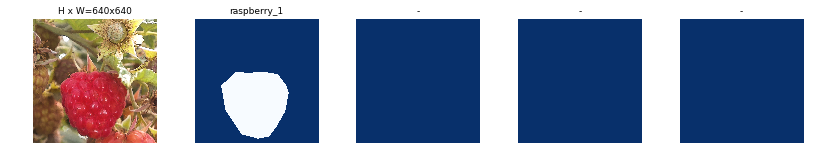

normal image  73
/host/Mask_RCNN/datasets/raspberry2/val/113.png
72


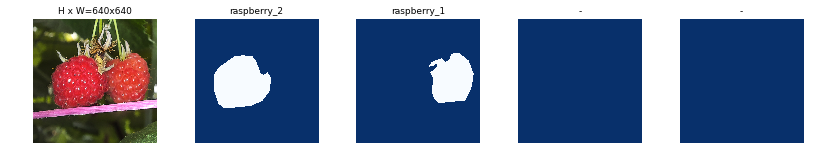

normal image  74
/host/Mask_RCNN/datasets/raspberry2/val/97.png
73


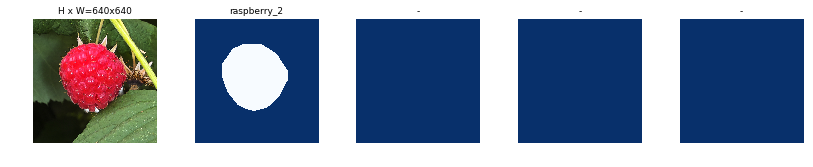

normal image  75
/host/Mask_RCNN/datasets/raspberry2/val/80.png
74


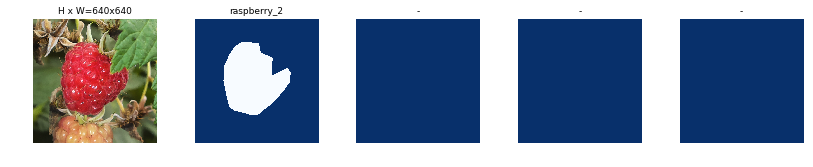

normal image  76
/host/Mask_RCNN/datasets/raspberry2/val/26.png
75


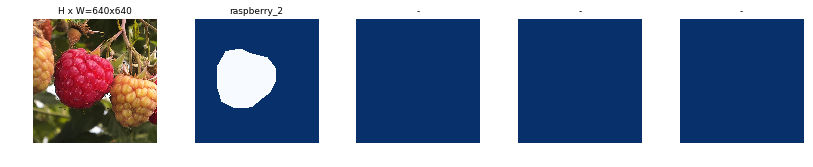

normal image  77
/host/Mask_RCNN/datasets/raspberry2/val/183.png
76


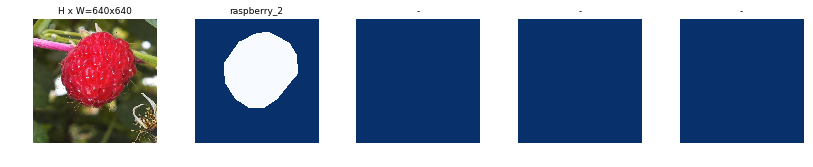

normal image  78
/host/Mask_RCNN/datasets/raspberry2/val/180.png
77


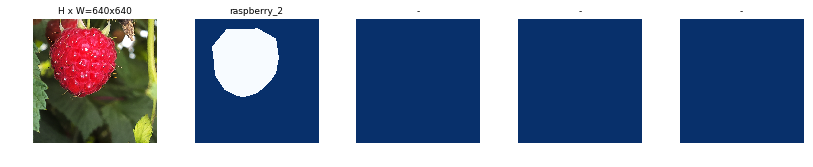

normal image  79
/host/Mask_RCNN/datasets/raspberry2/val/164.png
78


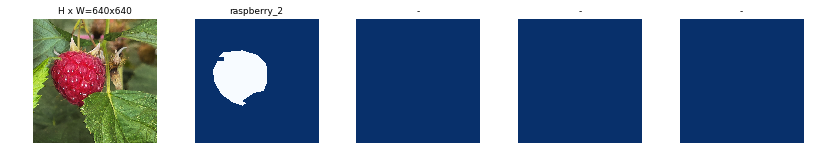

normal image  80
/host/Mask_RCNN/datasets/raspberry2/val/79.png
79


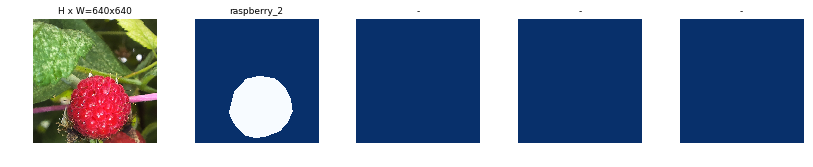

normal image  81
/host/Mask_RCNN/datasets/raspberry2/val/99.png
80


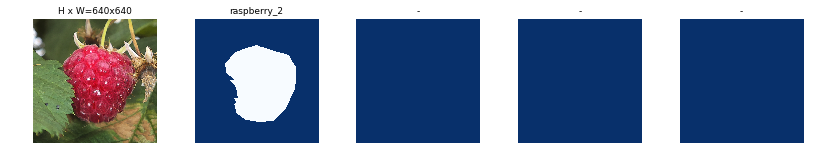

normal image  82
/host/Mask_RCNN/datasets/raspberry2/val/114.png
81


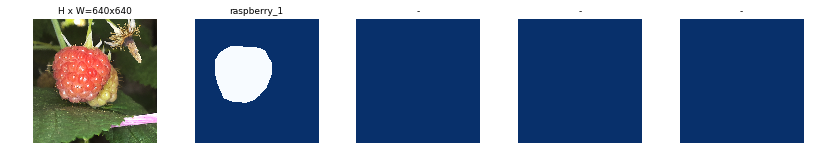

normal image  83
/host/Mask_RCNN/datasets/raspberry2/val/154.png
82


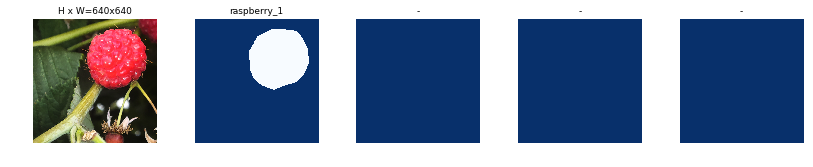

normal image  84
/host/Mask_RCNN/datasets/raspberry2/val/10.png
83


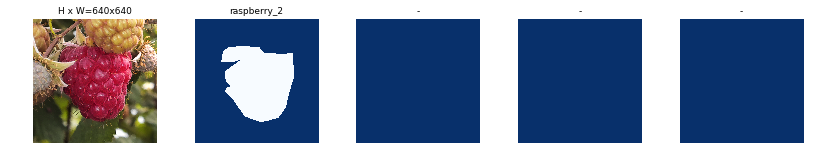

normal image  85
/host/Mask_RCNN/datasets/raspberry2/val/76.png
84


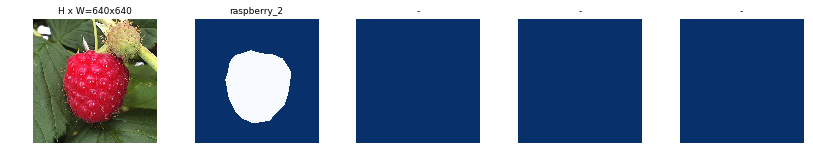

normal image  86
/host/Mask_RCNN/datasets/raspberry2/val/37.png
85


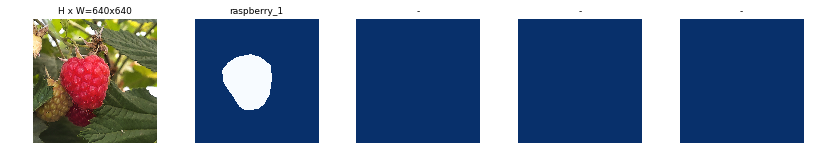

normal image  87
/host/Mask_RCNN/datasets/raspberry2/val/248.png
86


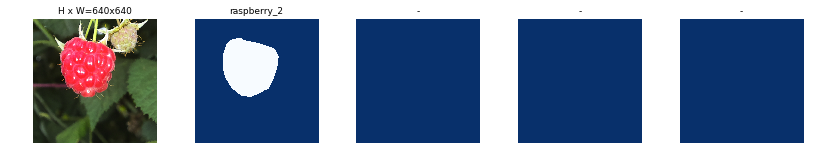

normal image  88
/host/Mask_RCNN/datasets/raspberry2/val/17.png
87


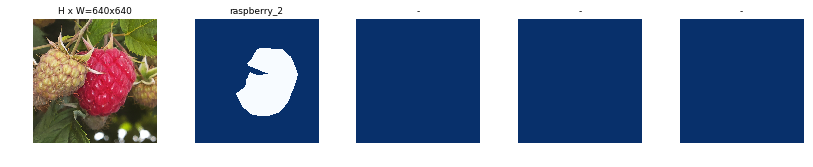

normal image  89
/host/Mask_RCNN/datasets/raspberry2/val/87.png
88


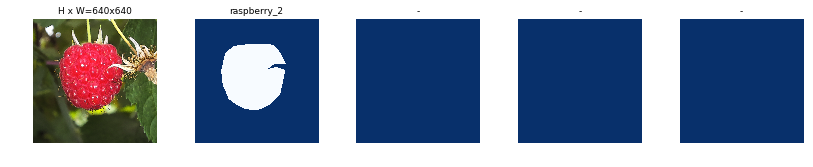

normal image  90
/host/Mask_RCNN/datasets/raspberry2/val/188.png
89


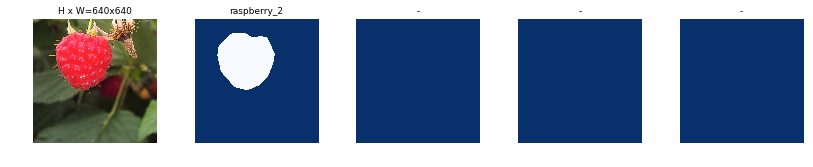

normal image  91
/host/Mask_RCNN/datasets/raspberry2/val/227.png
90


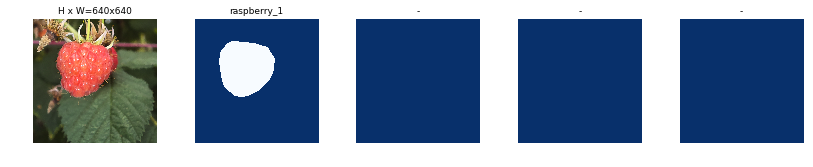

normal image  92
/host/Mask_RCNN/datasets/raspberry2/val/47.png
91


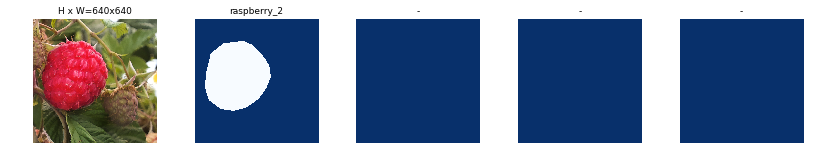

normal image  93
/host/Mask_RCNN/datasets/raspberry2/val/112.png
92


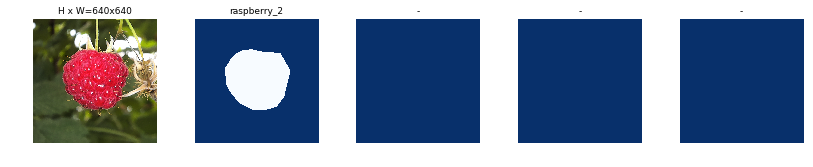

normal image  94
/host/Mask_RCNN/datasets/raspberry2/val/94.png
93


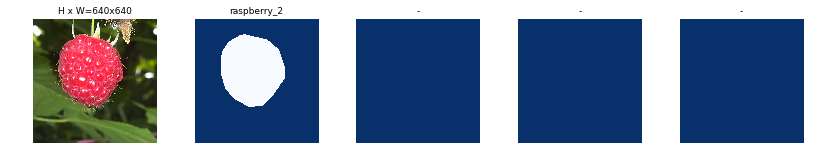

normal image  95
/host/Mask_RCNN/datasets/raspberry2/val/225.png
94


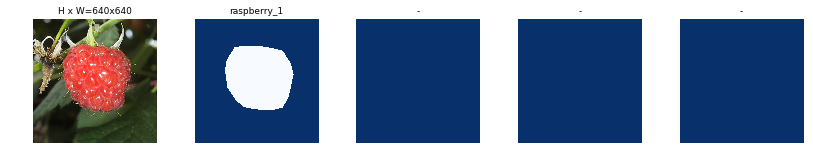

normal image  96
/host/Mask_RCNN/datasets/raspberry2/val/143.png
95


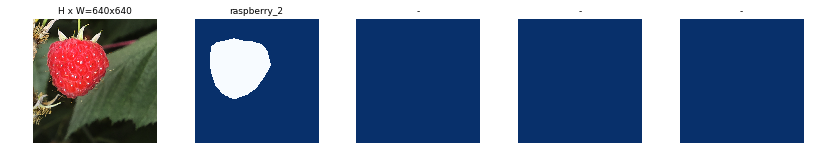

normal image  97
/host/Mask_RCNN/datasets/raspberry2/val/201.png
96


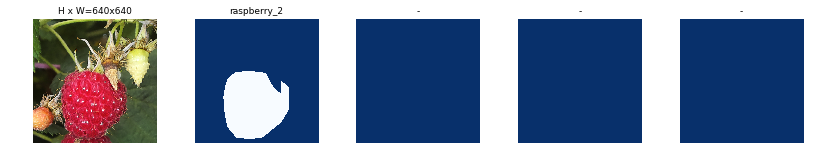

normal image  98
/host/Mask_RCNN/datasets/raspberry2/val/102.png
97


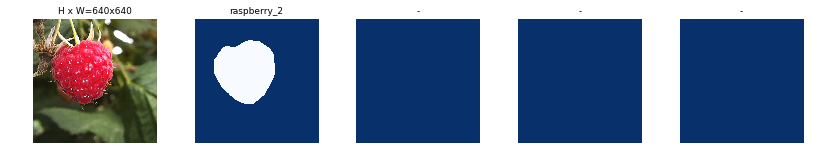

normal image  99
/host/Mask_RCNN/datasets/raspberry2/val/124.png
98


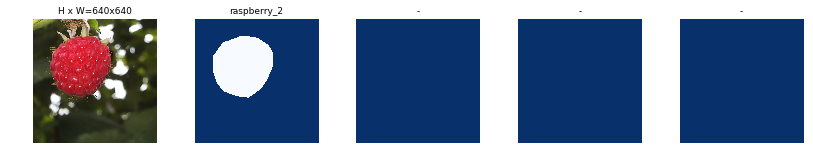

normal image  100
/host/Mask_RCNN/datasets/raspberry2/val/161.png
99


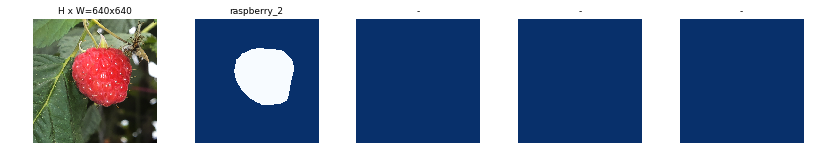

normal image  101
/host/Mask_RCNN/datasets/raspberry2/val/218.png
100


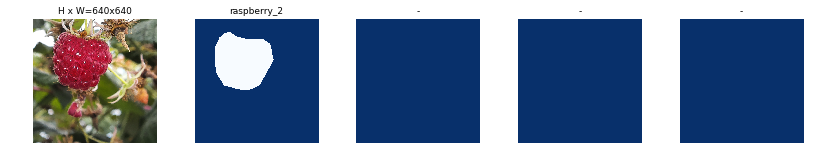

normal image  102
/host/Mask_RCNN/datasets/raspberry2/val/54.png
101


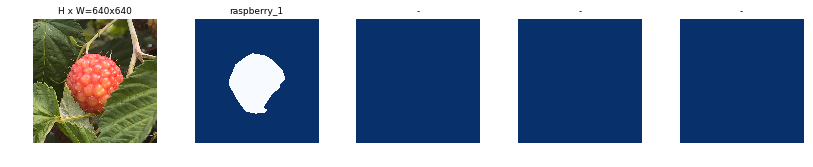

normal image  103
/host/Mask_RCNN/datasets/raspberry2/val/22.png
102


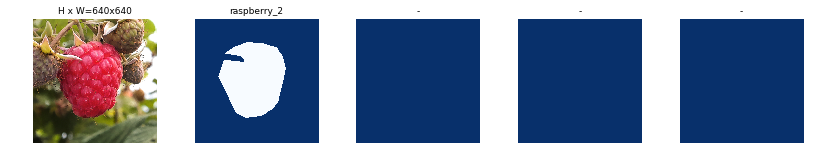

normal image  104
/host/Mask_RCNN/datasets/raspberry2/val/137.png
103


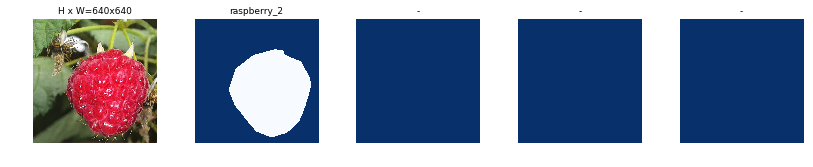

normal image  105
/host/Mask_RCNN/datasets/raspberry2/val/171.png
104


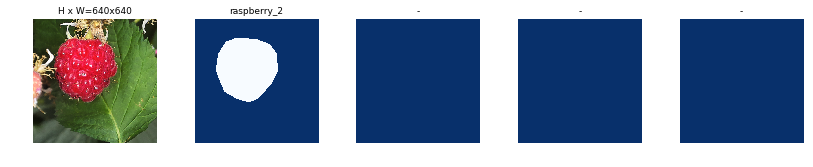

normal image  106
/host/Mask_RCNN/datasets/raspberry2/val/221.png
105


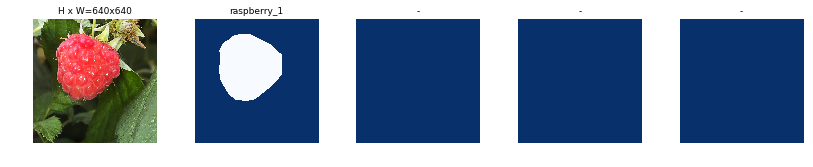

normal image  107
/host/Mask_RCNN/datasets/raspberry2/val/130.png
106


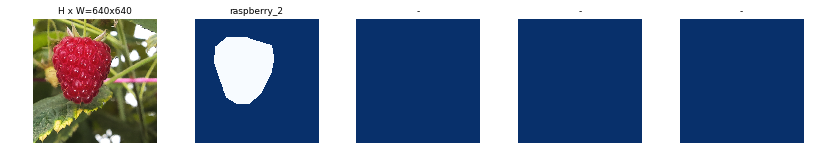

normal image  108
/host/Mask_RCNN/datasets/raspberry2/val/42.png
107


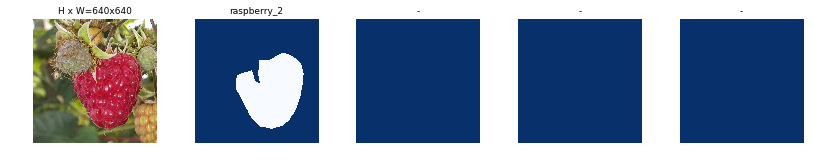

normal image  109
/host/Mask_RCNN/datasets/raspberry2/val/222.png
108


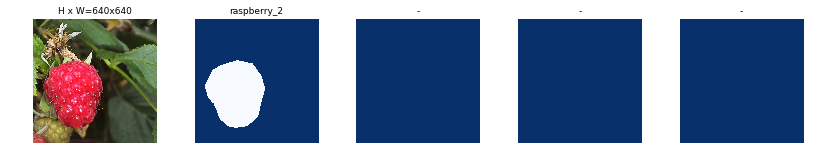

normal image  110
/host/Mask_RCNN/datasets/raspberry2/val/129.png
109


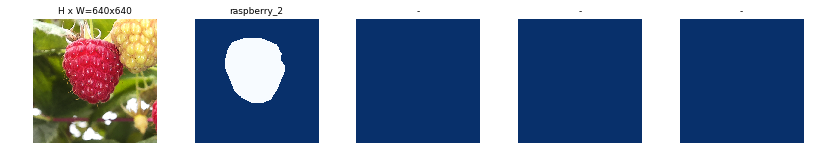

normal image  111
/host/Mask_RCNN/datasets/raspberry2/val/229.png
110


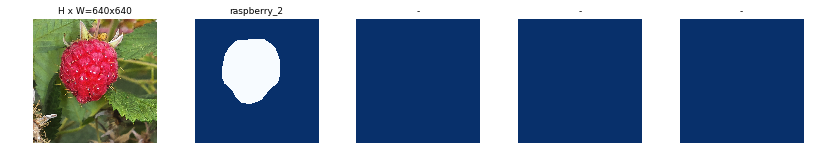

normal image  112
/host/Mask_RCNN/datasets/raspberry2/val/32.png
111


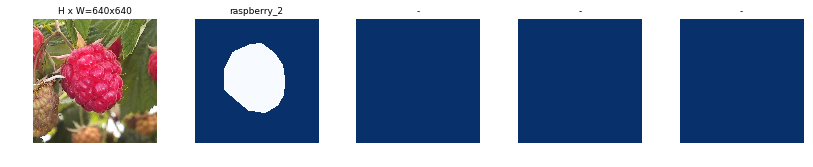

normal image  113
/host/Mask_RCNN/datasets/raspberry2/val/240.png
112


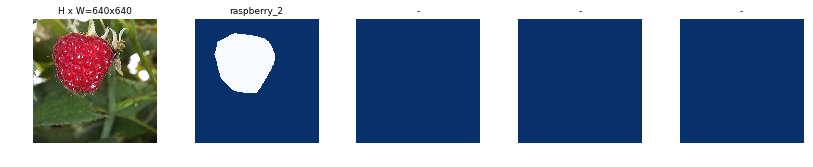

normal image  114
/host/Mask_RCNN/datasets/raspberry2/val/223.png
113


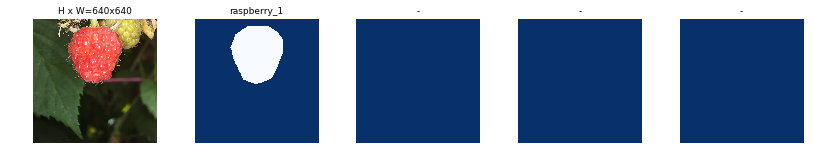

normal image  115
/host/Mask_RCNN/datasets/raspberry2/val/141.png
114


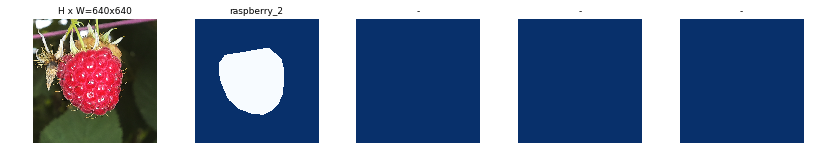

normal image  116
/host/Mask_RCNN/datasets/raspberry2/val/194.png
115


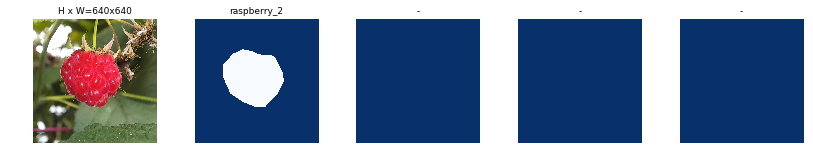

normal image  117
/host/Mask_RCNN/datasets/raspberry2/val/196.png
116


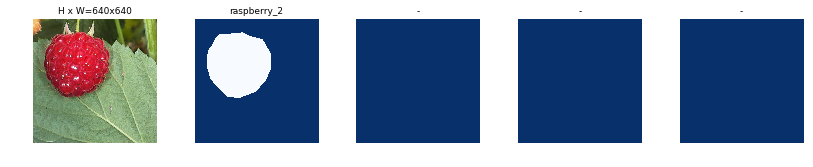

normal image  118
/host/Mask_RCNN/datasets/raspberry2/val/66.png
117


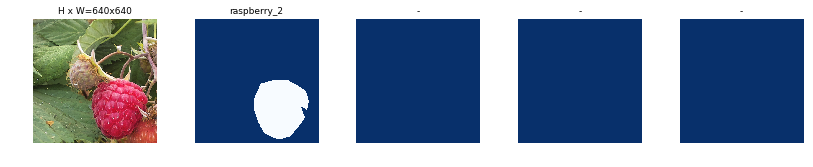

normal image  119
/host/Mask_RCNN/datasets/raspberry2/val/24.png
118


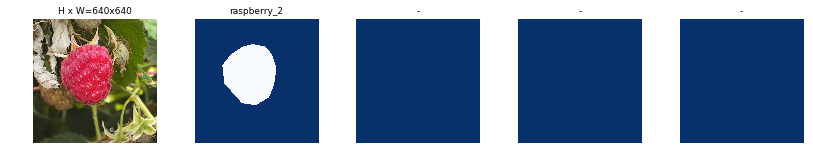

normal image  120
/host/Mask_RCNN/datasets/raspberry2/val/193.png
119


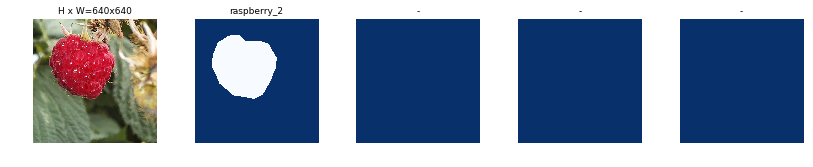

normal image  121
/host/Mask_RCNN/datasets/raspberry2/val/123.png
120


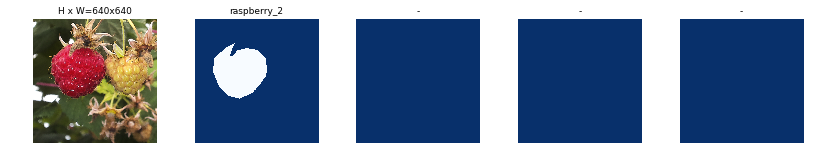

normal image  122
/host/Mask_RCNN/datasets/raspberry2/val/69.png
121


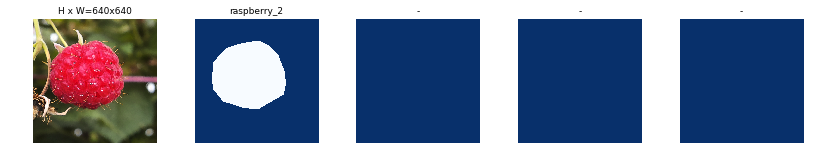

normal image  123
/host/Mask_RCNN/datasets/raspberry2/val/230.png
122


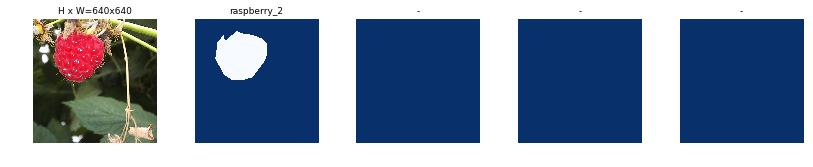

normal image  124
/host/Mask_RCNN/datasets/raspberry2/val/120.png
123


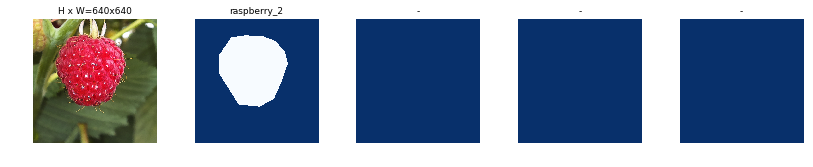

normal image  125
/host/Mask_RCNN/datasets/raspberry2/val/219.png
124


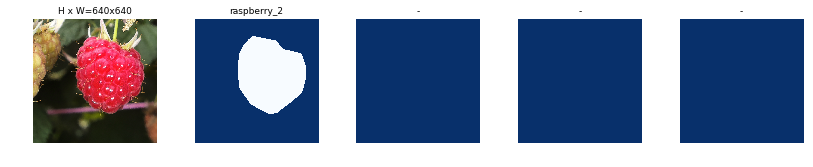

normal image  126
/host/Mask_RCNN/datasets/raspberry2/val/74.png
125


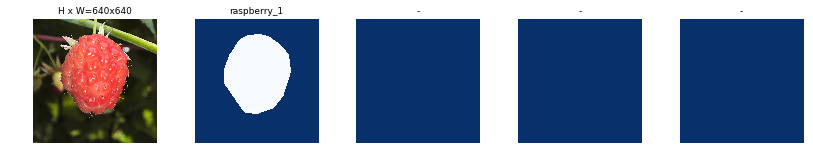

normal image  127
/host/Mask_RCNN/datasets/raspberry2/val/7.png
126


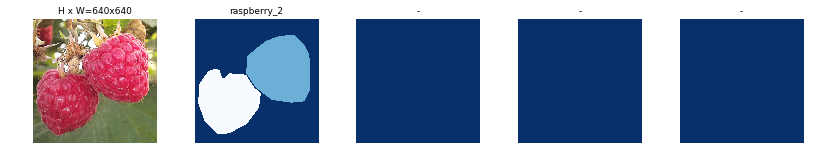

normal image  128
/host/Mask_RCNN/datasets/raspberry2/val/16.png
127


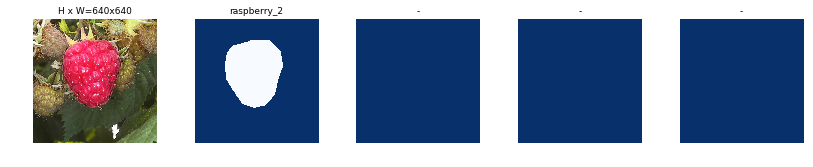

normal image  129
/host/Mask_RCNN/datasets/raspberry2/val/238.png
128


In [ ]:
# Load and display random samples
image_ids = dataset.image_ids # np.random.choice(dataset.image_ids, 5)
count = 0
for image_id in image_ids:
    count = count + 1
    image = dataset.load_image(image_id)
    
    mask, class_ids = dataset.load_mask(image_id)
    print("normal image ", count)
    print(dataset.image_reference(image_id))
    print(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)
    #print("Augmented images")
    image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(dataset=dataset, config=config, 
                  image_id=image_id, augment=False, augmentation=augmentation,
                  use_mini_mask=False)
    #visualize.display_top_masks(image, mask, class_ids, dataset.class_names)